<a href="https://colab.research.google.com/github/cdevrywhr/Simple-KMeans/blob/main/Clustring_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
#install packages yang digunakan 
install.packages("dplyr") # data manipulasi
install.packages("factoextra") # visualisasi data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [104]:
#import library
library(dplyr)
library(factoextra)

In [105]:
#data kelahiran dan kematian di ASEAN 2015
df <- read.csv(file="asean_demografi.csv")



1.  Total Fertility Rate (TFR), yaitu rata-rata jumlah anak yang dilahirkan hidup oleh wanita pada akhir masa reproduksinya.

2.  Angka Kematian Bayi (AKB), yaitu banyaknya kematian bayi per 1000 kelahiran hidup.

3.   Angka Kematian Ibu (AKI), yaitu banyaknya kematian ibu per 100000 penduduk. Kematian ibu yang dicatat adalah kematian ibu yang terjadi pada saat kehamilan, atau selama 42 hari sejak terminasi kehamilan yang disebabkan atau diperparah oleh proses kehamilan tersebut.
4.   Angka Harapan Hidup (AHH), yaitu rata-rata tahun hidup yang masih akan dijalani oleh seseorang yang telah berhasil mencapai umur x, pada suatu tahun tertentu, dalam situasi mortalitas yang berlaku di lingkungan masyarakatnya.





In [106]:
df

Negara,TFR,AKB,AKI,AHH
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Brunei Darussalam,1.8,8.8,59.7,77.7
Kamboja,2.6,27.0,161.0,68.3
Indonesia,2.4,22.2,126.0,70.8
Laos,2.9,57.0,197.0,68.0
Malaysia,2.0,6.9,23.8,74.8
Myanmar,2.2,44.8,236.0,64.4
Filipina,2.9,23.0,114.0,70.4
Singapura,1.2,1.7,7.1,82.9
Thailand,1.5,6.2,24.6,74.6


In [113]:
#normalisasi data
scaled_data <- round(scale(df[2:5]),4)
scaled_data

TFR,AKB,AKI,AHH
-0.6382,-0.6946,-0.5133,0.9706
0.7800,0.3224,0.7668,-0.7907
0.4254,0.0542,0.3245,-0.3223
1.3118,1.9988,1.2217,-0.8469
-0.2836,-0.8008,-0.9670,0.4272
0.0709,1.3171,1.7146,-1.5215
1.3118,0.0989,0.1729,-0.3972
-1.7018,-1.0913,-1.1780,1.9450
-1.1700,-0.8399,-0.9569,0.3897
-0.1064,-0.3649,-0.5853,0.1462


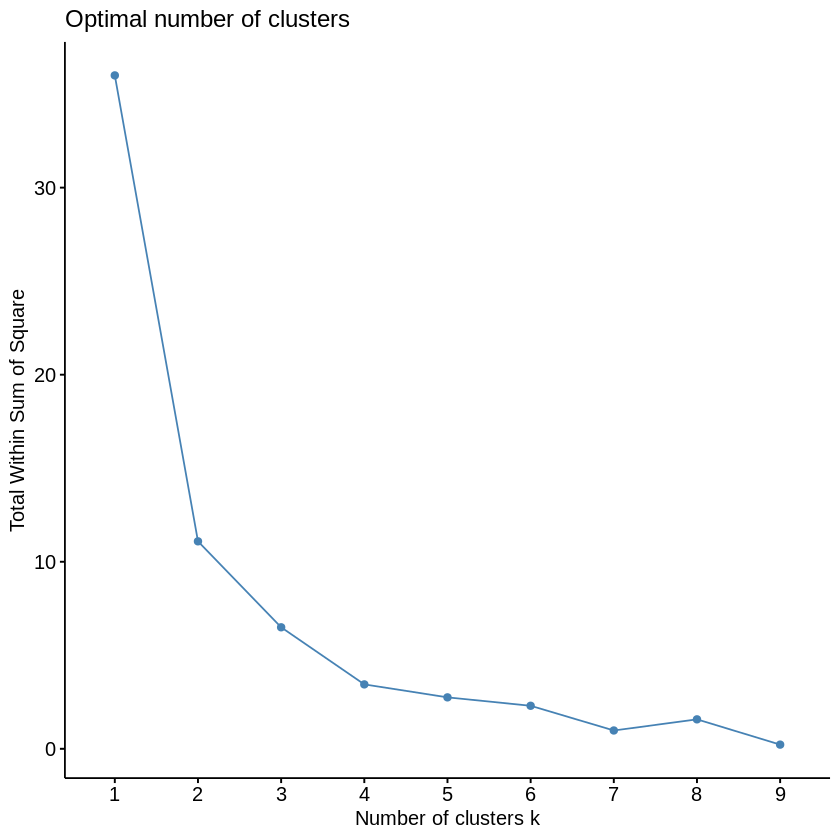

In [114]:
# Elbow method untuk melihat optimal cluster
set.seed(123)
fviz_nbclust(scaled_data,kmeans,method="wss", k.max = 9)

In [115]:
set.seed(123)
kmclustering <- kmeans(scaled_data,centers=4,nstart = 25)
kmclustering

K-means clustering with 4 clusters of sizes 3, 4, 2, 1

Cluster means:
         TFR      AKB       AKI       AHH
1  0.8390667  0.15850  0.421400 -0.503400
2 -0.5495500 -0.67505 -0.755625  0.483425
3  0.6913500  1.65795  1.468150 -1.184200
4 -1.7018000 -1.09130 -1.178000  1.945000

Clustering vector:
 [1] 2 1 1 3 2 3 1 4 2 2

Within cluster sum of squares by cluster:
[1] 0.7564396 1.3354210 1.3512916 0.0000000
 (between_SS / total_SS =  90.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [116]:
df %>%
  mutate(Klaster = kmclustering$cluster) %>%
  group_by(Klaster) %>%
  summarise(Mean_TFR = mean(TFR), Mean_AKB = mean(AKB), Mean_AKI = mean(AKI), Mean_AHH = mean(AHH))

Klaster,Mean_TFR,Mean_AKB,Mean_AKI,Mean_AHH
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.633333,24.06667,133.6667,69.83333
2,1.850000,9.15000,40.5250,75.10000
3,2.550000,50.90000,216.5000,66.20000
4,1.200000,1.70000,7.1000,82.90000


berdasarkan hasil dari pengelompokan maka 


1.   Cluster 4 -> negara yang memiliki tingkat kesehatan tertinggi di ASEAN
2.   Cluster 3 -> negara yang memiliki tingkat kesehatan terendah di ASEAN
3.   Cluster 2 -> negara yang memiliki tingkat kesehatan tinggi di ASEAN
4.   Cluster 1 -> negara yang miliki tingakta kesehatan cukup di ASEAN












In [117]:
df %>%
  mutate (Klaster = kmclustering$cluster) %>%
  select(Negara, Klaster) %>%
  arrange(Klaster)

Negara,Klaster
<chr>,<int>
Kamboja,1
Indonesia,1
Filipina,1
Brunei Darussalam,2
Malaysia,2
Thailand,2
Vietnam,2
Laos,3
Myanmar,3


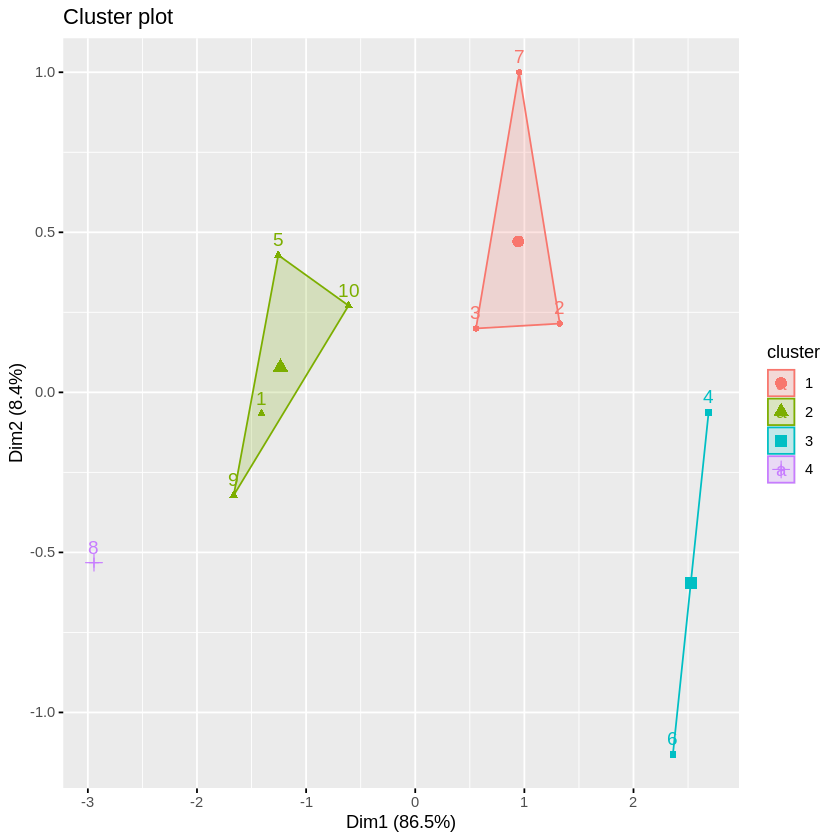

In [137]:
set.seed(123)
fviz_cluster(kmclustering,data=scaled_data,  show.clust.cent = TRUE)